# Some statistics for the public articles in the KiltHub repository

We build descriptive statistics for our institutional repository, that can give us some insights on what needs to be improved to make the publication process easier for both librarians and researchers.

Questions we are interested to explore: 

1) **CMU participation**: How are the publications distributed by category
2) **KitlHub Times**: How is the timeline for publications 
3) **Accessibility**: Are researchers (users) linking their user profiles to their scholar or ORCiD?
4) **Datasets**:
    
    a) How many datasets we have and their institutions 
    
    b) How many datasets have a readme file

In [1]:
from collections import Counter

import json
import requests
import pandas as pd

In [2]:
# Utils (functions)

# to check if an article has a readme file
def has_readme(article):
    readm = False
    for file in article['files']:
        if 'readme' in file['name'].lower():
            return True
    if not readm:
        return False

# to check if an article has a zip file
def is_zip(article):
    for file in article['files']:
        if file['mimetype'] == 'application/zip':
            return True
    return False

# formatting 
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_format

In [3]:
# data loaded from a previous query, to check how data was retrieved see the notebook "GET_PUBLIC_METADATA.ipynb"
public_articles = json.load(open('public_articles_data.json'))

In [4]:
len(public_articles)

9000

# Number of publications by type

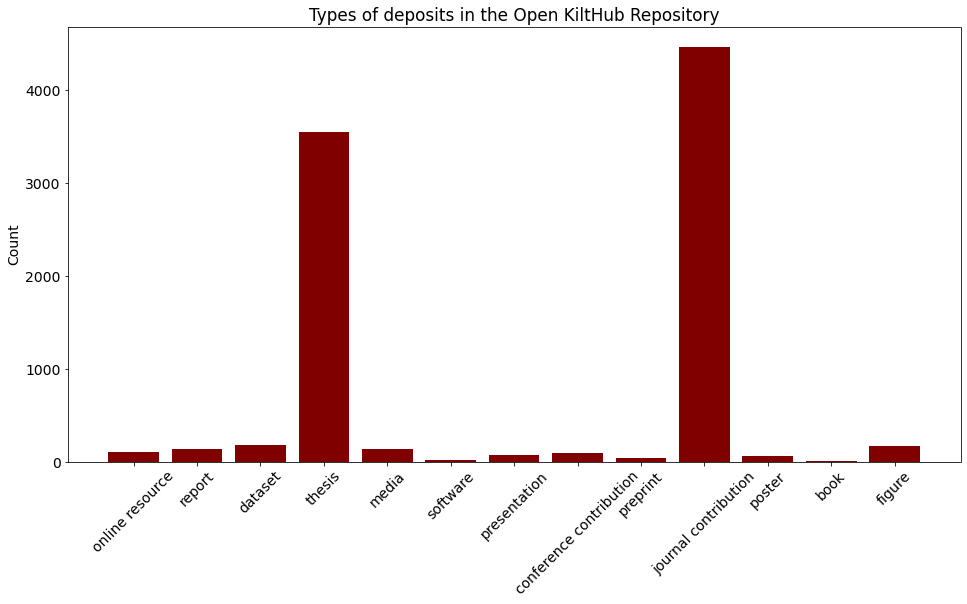

In [5]:
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 14})  # Adjusts the default font size

# Extract 'defined_type' values
defined_types = [article['defined_type_name'] for article in public_articles if 'defined_type_name' in article]

# Count occurrences
type_counts = Counter(defined_types)

# Prepare data for plotting
types = list(type_counts.keys())
counts = list(type_counts.values())

# Create bar plot
plt.figure(figsize=(16, 8))
plt.bar(types, counts, color='maroon')
plt.ylabel('Count')
plt.title('Types of deposits in the Open KiltHub Repository')
plt.xticks(rotation=45)
plt.show()

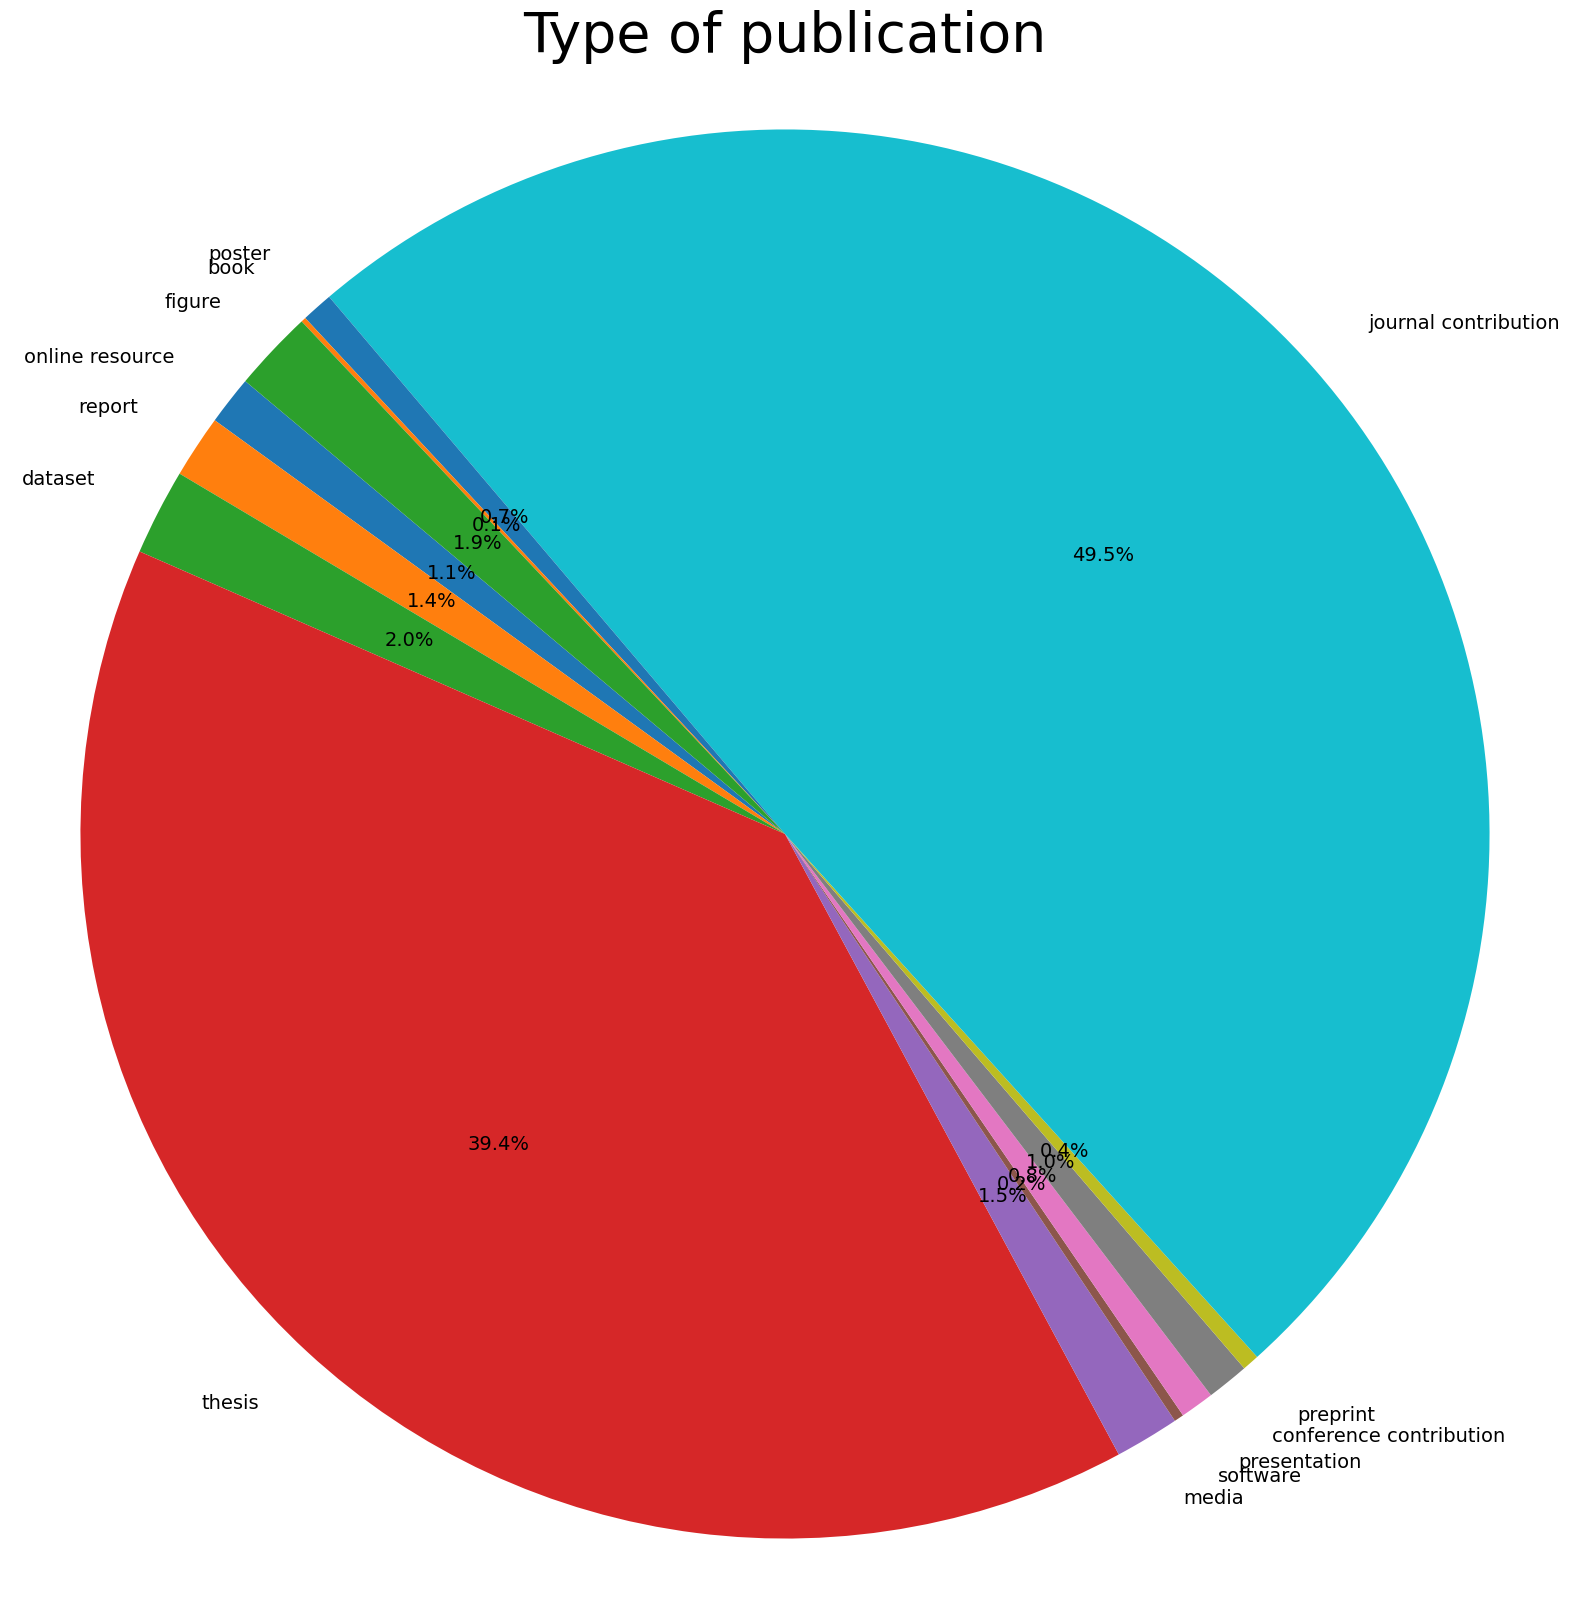

In [6]:
# Create pie chart
plt.figure(figsize=(20, 20))
plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of publication', fontsize=40)
plt.show()

# From these publications, how many authors have their ORCiD linked? 

In [6]:
has_orcid = []
for article in public_articles:
    if 'authors' in article:
        try:
            if len(article['authors'][0]['orcid_id']) > 0:
                has_orcid.append(True)
            else:
                has_orcid.append(False)
        except:
            print('No ORCID')

In [7]:
has_orcid

[False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 F

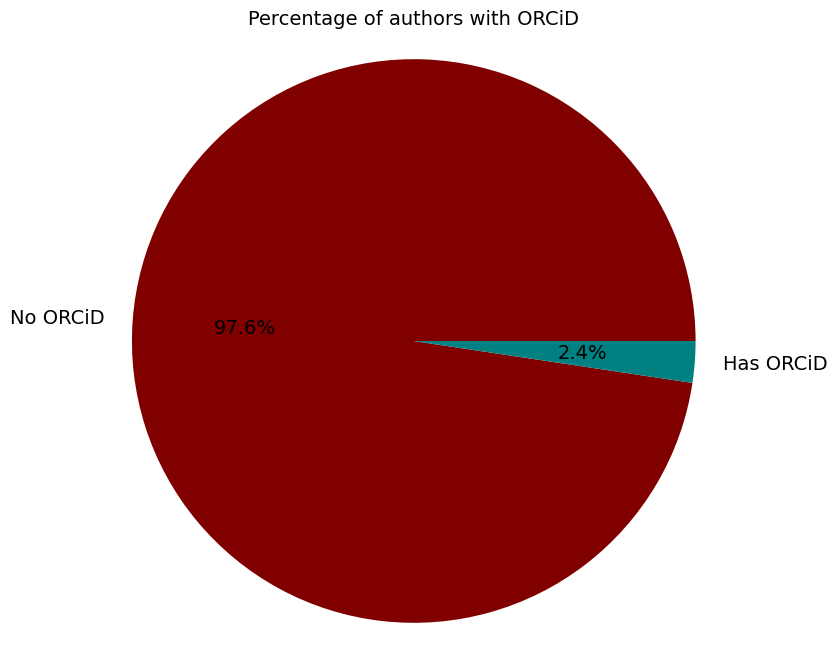

In [11]:
orcid_counts = Counter(has_orcid)

# Prepare data for plotting
labels = ['No ORCiD' if not key else 'Has ORCiD' for key in orcid_counts.keys()]
sizes = orcid_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of authors with ORCiD', fontsize=14)
plt.show()

# Publication Dates and Timeline

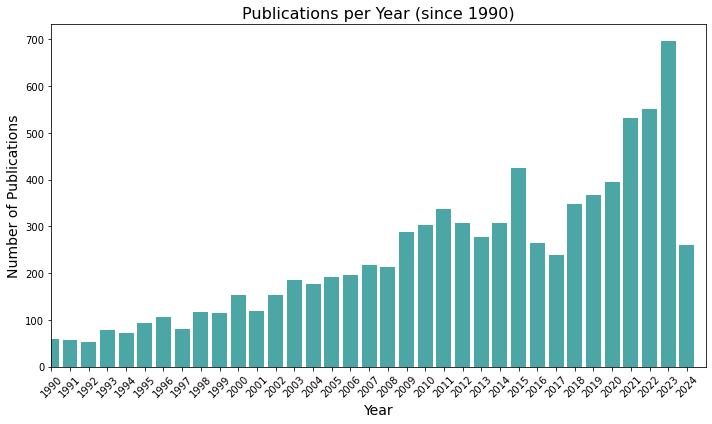

In [15]:
publication_years = [datetime.strptime(article['published_date'].split('T')[0], "%Y-%m-%d").year for article in public_articles if 'published_date' in article]

# Count publications per year
year_counts = Counter(publication_years)

# Prepare data for plotting
years = sorted(year_counts.keys())
publications = [year_counts[year] for year in years]

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(years, publications, color='#008080', alpha=0.7)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.title('Publications per Year (since 1990)', fontsize=16)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.xlim(1990, 2025)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

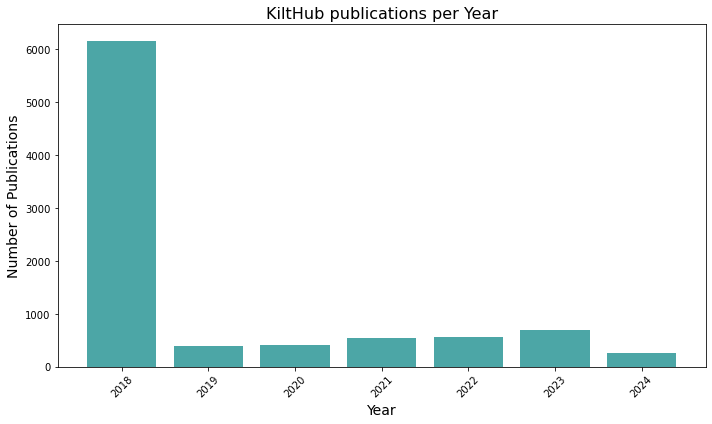

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt


created_years = [datetime.strptime(article['created_date'].split('T')[0], "%Y-%m-%d").year for article in public_articles if 'created_date' in article]

# Count publications per year
year_counts = Counter(created_years)

# Prepare data for plotting
years = sorted(year_counts.keys())
publications = [year_counts[year] for year in years]

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(years, publications, color='#008080', alpha=0.7)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.title('KiltHub publications per Year', fontsize=16)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# What about Datasets?

In [5]:
datasets = []

for article in public_articles:
    if article['defined_type_name'] == 'dataset':
       datasets.append(article)

In [6]:
name_files = [file['name'] for file in datasets[10]['files']]

False

In [7]:
def is_compressed(file):
    return any([file.endswith('.tar'), file.endswith('.gz'), file.endswith('.zip')])

def has_compressed_file(dataset):
    return any([is_compressed(file['name']) for file in dataset['files']])

In [8]:
datasets[1]

{'files': [{'id': 46850365,
   'name': 'README2.txt',
   'size': 7346,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/46850365',
   'supplied_md5': 'da5181b5a9d1e5792233d23d660ae89c',
   'computed_md5': 'da5181b5a9d1e5792233d23d660ae89c',
   'mimetype': 'text/plain'},
  {'id': 46850368,
   'name': 'NBSDatabase.csv',
   'size': 12703,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/46850368',
   'supplied_md5': '9b9370a763bde317e06de36f9fa0917a',
   'computed_md5': '9b9370a763bde317e06de36f9fa0917a',
   'mimetype': 'text/plain'}],
 'custom_fields': [{'name': 'Publisher Statement', 'value': ''},
  {'name': 'Date', 'value': '2023-06-08'}],
 'authors': [{'id': 5970866,
   'full_name': 'Marissa Webber',
   'is_active': True,
   'url_name': 'Marissa_Webber',
   'orcid_id': '0000-0002-8035-732X'},
  {'id': 16158215,
   'full_name': 'Lillian Mei',
   'is_active': False,
   'url_name': '_',
   'orcid_id': ''},
  {'id': 3

In [9]:
have_readme = []
for nd in range(0,len(datasets)):
    try:
        have_readme.append(has_readme(datasets[nd]))
    except:
        have_readme.append(False)
        print(f'Dataset No.{nd} has no files?')

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


In [10]:
have_compressed = []
no_files = []
for nd in range(0,len(datasets)):
    try:
        have_compressed.append(has_compressed_file(datasets[nd]))
        no_files.append(len(datasets[nd]['files']))
    except:
        have_compressed.append(False)
        no_files.append(0)
        print(f'Dataset No.{nd} has no files?')

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


In [11]:
from datetime import datetime

dataset_id = [article['id'] for article in datasets]
created_dates = [datetime.strptime(article['created_date'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in datasets if 'created_date' in article]
published_dates = [datetime.strptime(article['published_date'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in datasets if 'published_date' in article]
firstonline_dates = [datetime.strptime(article['timeline']['firstOnline'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in datasets if 'timeline' in article]
posted_dates = [datetime.strptime(article['timeline']['posted'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in datasets if 'timeline' in article]

### We are going to store the values in a DataFrame

In [12]:
df_datasets = pd.DataFrame(
    {'id': dataset_id,
     'created_date': created_dates, 
     'published_date': published_dates, 
     'firstOnline_date': firstonline_dates, 
     'posted_date': posted_dates, 
     'has_readme': have_readme, 
     'has_compressed': have_compressed, 
     'num_files': no_files}
    
    )

In [13]:
df_datasets.head()

,id,created_date,published_date,firstOnline_date,posted_date,has_readme,has_compressed,num_files
0,25971379,2024-06-20 14:56:23,2024-06-20 14:56:23,2024-06-05 14:47:01,2024-06-20 14:56:23,False,True,2
1,23393702,2024-06-13 16:01:07,2024-06-13 16:01:07,2023-07-10 14:51:05,2024-06-13 16:01:07,True,False,2
2,14981121,2024-06-10 15:37:38,2024-06-10 15:37:38,2021-08-12 17:19:16,2024-06-10 15:37:38,True,False,6
3,25979656,2024-06-10 15:04:57,2024-06-10 15:04:56,2024-06-10 15:04:56,2024-06-10 15:04:56,True,False,3
4,25765539,2024-05-31 16:52:56,2024-05-31 16:52:56,2024-05-31 16:52:56,2024-05-31 16:52:56,True,False,9


In [18]:
import numpy as np

np.shape(df_datasets[(df_datasets['has_readme'] == False) & (df_datasets['has_compressed'] == False)])

(33, 8)

In [64]:
df_datasets[(df_datasets['has_readme'] == False)]

,id,created_date,published_date,firstOnline_date,posted_date,has_readme,has_compressed,num_files
0,25971379,2024-06-20 14:56:23,2024-06-20 14:56:23,2024-06-05 14:47:01,2024-06-20 14:56:23,False,True,2
5,25696293,2024-05-30 15:33:23,2024-05-30 15:33:23,2024-05-30 15:33:23,2024-05-30 15:33:23,False,False,0
7,25723980,2024-05-16 15:04:56,2024-05-16 15:04:56,2024-05-16 15:04:56,2024-05-16 15:04:56,False,True,1
14,25213076,2024-02-13 15:44:28,2024-02-13 15:44:28,2024-02-13 15:44:28,2024-02-13 15:44:28,False,False,1
16,25154549,2024-02-07 14:50:54,2024-02-07 14:50:54,2024-02-07 14:50:54,2024-02-07 14:50:54,False,False,0
...,...,...,...,...,...,...,...,...
169,7584005,2019-01-18 21:46:03,2019-01-18 21:46:03,2019-01-18 21:46:03,2019-01-18 21:46:03,False,False,5
170,7571876,2019-01-18 21:45:46,2019-01-18 21:45:46,2019-01-18 21:45:46,2019-01-18 21:45:46,False,False,5
172,7290074,2018-11-19 18:03:18,2018-11-19 18:03:18,2018-11-19 18:03:18,2018-11-19 18:03:18,False,True,1
173,7290059,2018-11-19 17:47:39,2018-11-19 17:47:39,2018-11-19 17:47:39,2018-11-19 17:47:39,False,True,1


In [70]:
firstonline_dates = [datetime.strptime(article['timeline']['firstOnline'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in public_articles if 'timeline' in article]
posted_dates = [datetime.strptime(article['timeline']['posted'].rstrip('Z'), "%Y-%m-%dT%H:%M:%S") for article in public_articles if 'timeline' in article]

In [71]:
days_difference = [(pub - crea).days for crea, pub in zip(firstonline_dates, posted_dates)]

In [72]:
# Initialize a dictionary for categories
categories_count = {"less_than_2": 0, "between_2_and_30": 0, "more_than_30": 0}

# Iterate through days_difference and increment the appropriate category
for days in days_difference:
    if days < 2:
        categories_count["less_than_2"] += 1
    elif 2 <= days <= 30:
        categories_count["between_2_and_30"] += 1
    else:
        categories_count["more_than_30"] += 1


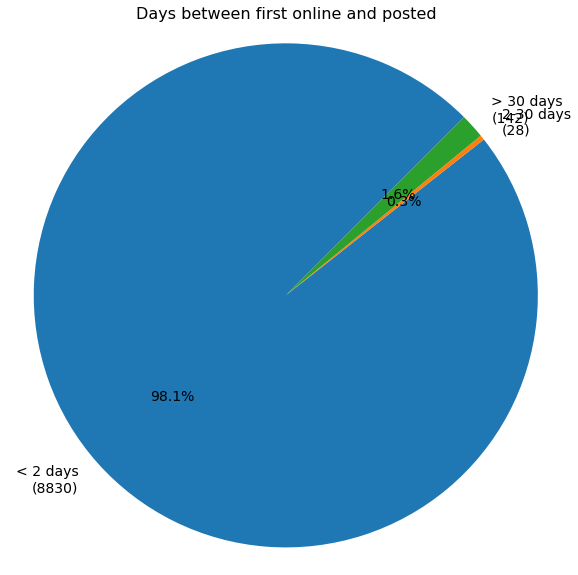

In [75]:
total = sum(categories_count.values())

# Prepare data and labels for the pie chart
data = list(categories_count.values())
labels = [f"< 2 days\n({count})" for count in data[:1]] + \
         [f"2-30 days\n({count})" for count in data[1:2]] + \
         [f"> 30 days\n({count})" for count in data[2:]]

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(data, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=45, textprops={'fontsize': 14})
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Days between first online and posted', fontsize=16)
# Display the pie chart
plt.show()

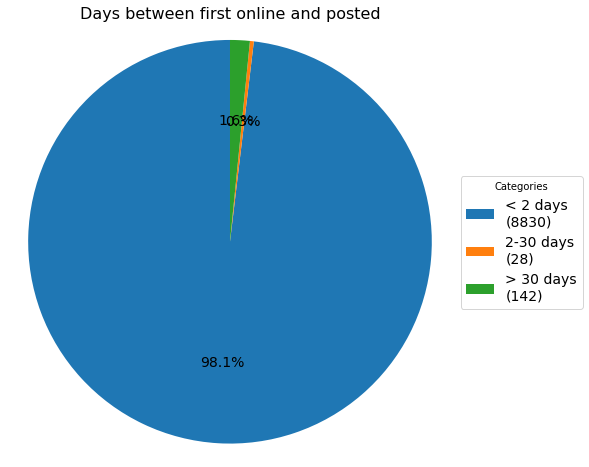

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(data, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90, textprops={'fontsize': 14})

# Here, we remove the labels parameter from ax.pie() and instead use ax.legend()
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Days between first online and posted', fontsize=16)

plt.show()

In [46]:
posted_dates[101]

datetime.datetime(2020, 11, 3, 0, 0)

In [ ]:
readme_counts = Counter(have_readme)

# Prepare data for plotting
labels = ['No README' if not key else 'Has README' for key in readme_counts.keys()]

# How many public datasets have a readme file?

Text(0.5, 1.0, 'Percentage of datasets with README')

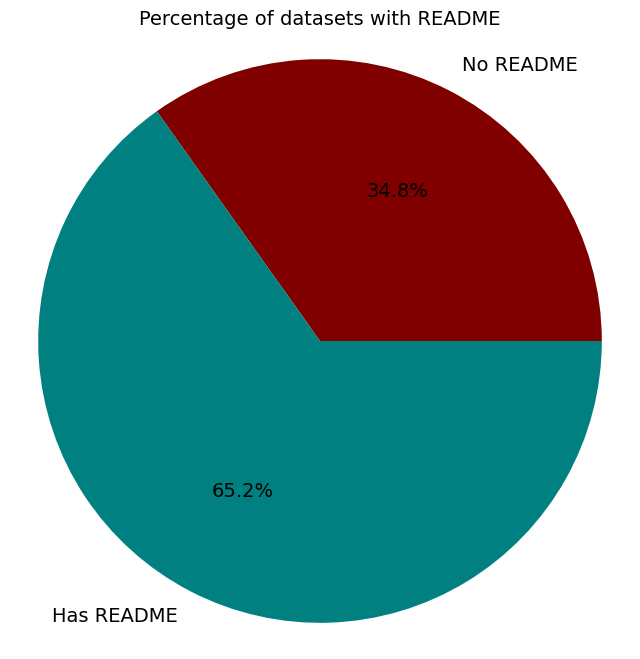

In [15]:

sizes = readme_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of datasets with README', fontsize=14)

# When were this datasets published? (make them public on KH)

In [8]:
from datetime import datetime


In [9]:
no_rdm_ix = [index for index, value in enumerate(have_readme) if not value]
rdm_ix =  [index for index, value in enumerate(have_readme) if value]

In [12]:
no_rdm_count = Counter([created_years[i] for i in no_rdm_ix]  )
rdm_count = Counter([created_years[i] for i in rdm_ix])

nordm_years = sorted(no_rdm_count.keys())
rdm_years = sorted(rdm_count.keys())

nordm_counts = [no_rdm_count[year] for year in nordm_years]
rdm_counts = [rdm_count[year] for year in rdm_years]


NameError: name 'nordm_years' is not defined

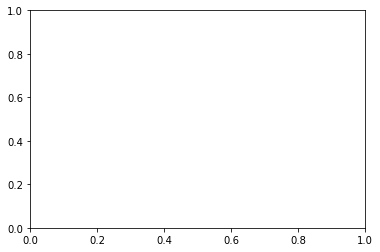

In [12]:
width = 0.5
fig, ax = plt.subplots()
bars1 = ax.bar(nordm_years, nordm_counts, width, label='No Rdme', alpha=0.5)
bars2 = ax.bar(rdm_years, rdm_counts, width, label='Has Rdme', alpha=0.5)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
plt.figure(figsize=(8, 8))
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Datasets with and without README per year')
ax.legend()

plt.show()

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


In [36]:
datasets[no_rdm_ix[10]]['files']

[{'id': 43117111,
  'name': '00_helpful_project_data.zip',
  'size': 34531216,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/43117111',
  'supplied_md5': '2721a9ed18543e5a234b07eb6e738688',
  'computed_md5': '2721a9ed18543e5a234b07eb6e738688',
  'mimetype': 'application/zip'}]

In [40]:
zip_nordm = [have_zip[no_rdm_ix[i]] for i in range(len(no_rdm_ix))]

Text(0.5, 1.0, 'Percentage of datasets with Zip')

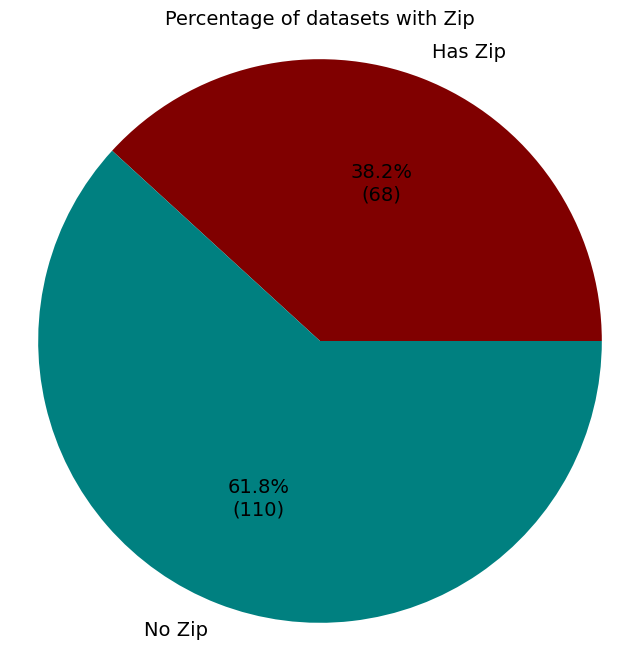

In [44]:
zipfile_counts = Counter(have_zip)

# Prepare data for plotting
labels = ['No Zip' if not key else 'Has Zip' for key in zipfile_counts.keys()]
sizes = zipfile_counts.values()


# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=autopct_format(sizes), startangle=0, colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of datasets with Zip', fontsize=14)

[True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True]